## **录音过程**

[截自:Matlab Audio Device Reader](https://www.mathworks.com/help/audio/ref/audiodevicereader.html)   


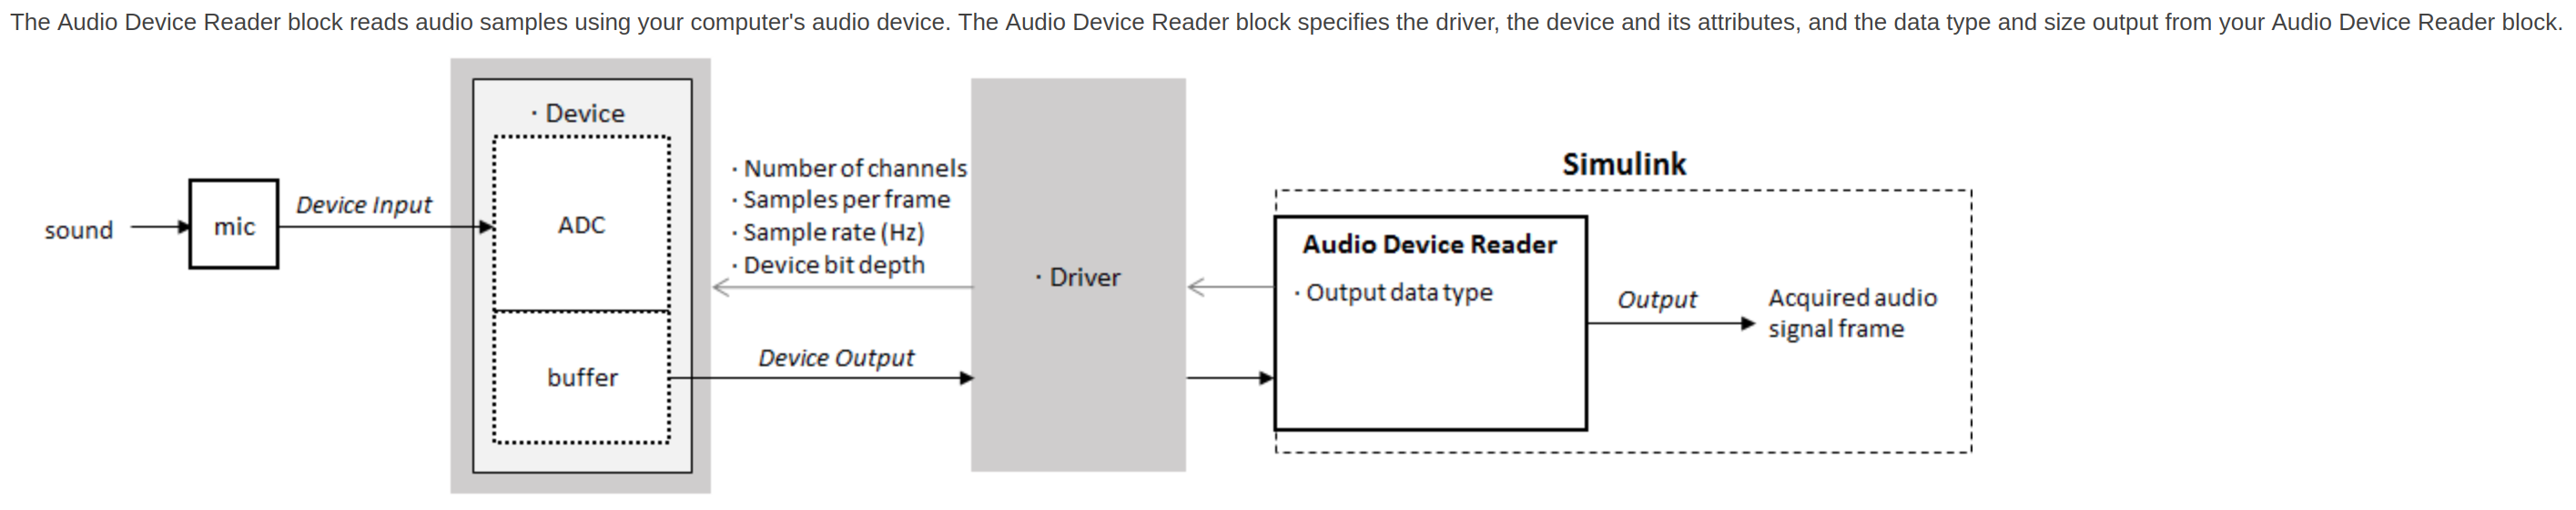

In [86]:
import IPython.display as ipd
ipd.Image("img/audio_read.png")

## **播放过程**

[截自Matlab Audio Device Writer](https://www.mathworks.com/help/audio/ref/audiodevicewriter.html)

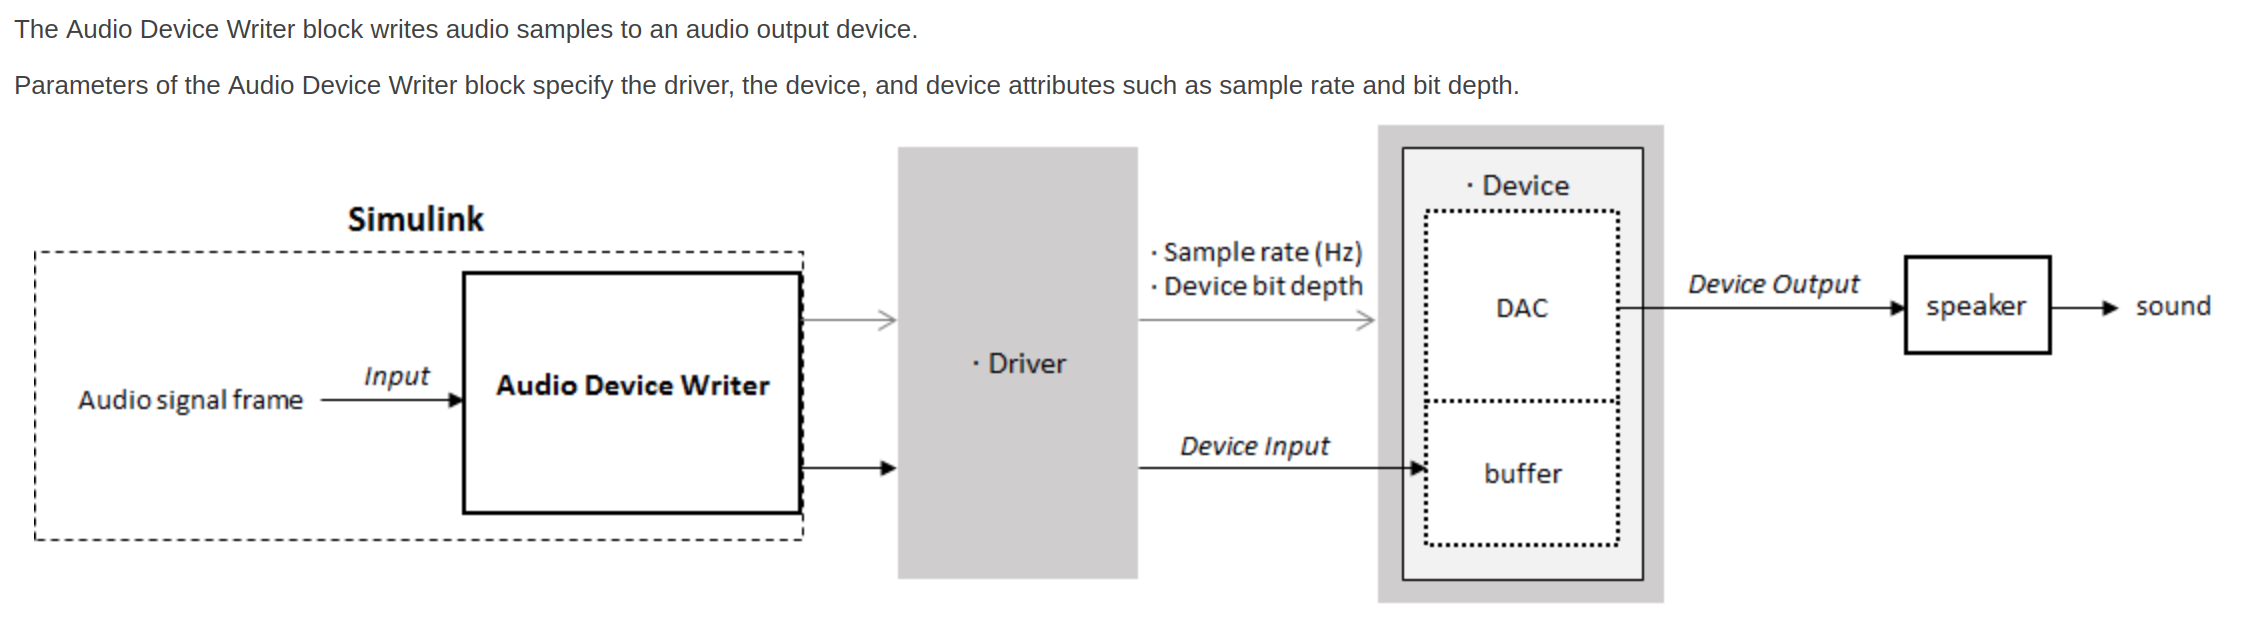

In [88]:
ipd.Image("img/audio_write.png")

## **同时录音和播放**

[截自 Audio I/O: Buffering, Latency, and Throughput](https://www.mathworks.com/help/audio/gs/audio-io-buffering-latency-and-throughput.html)

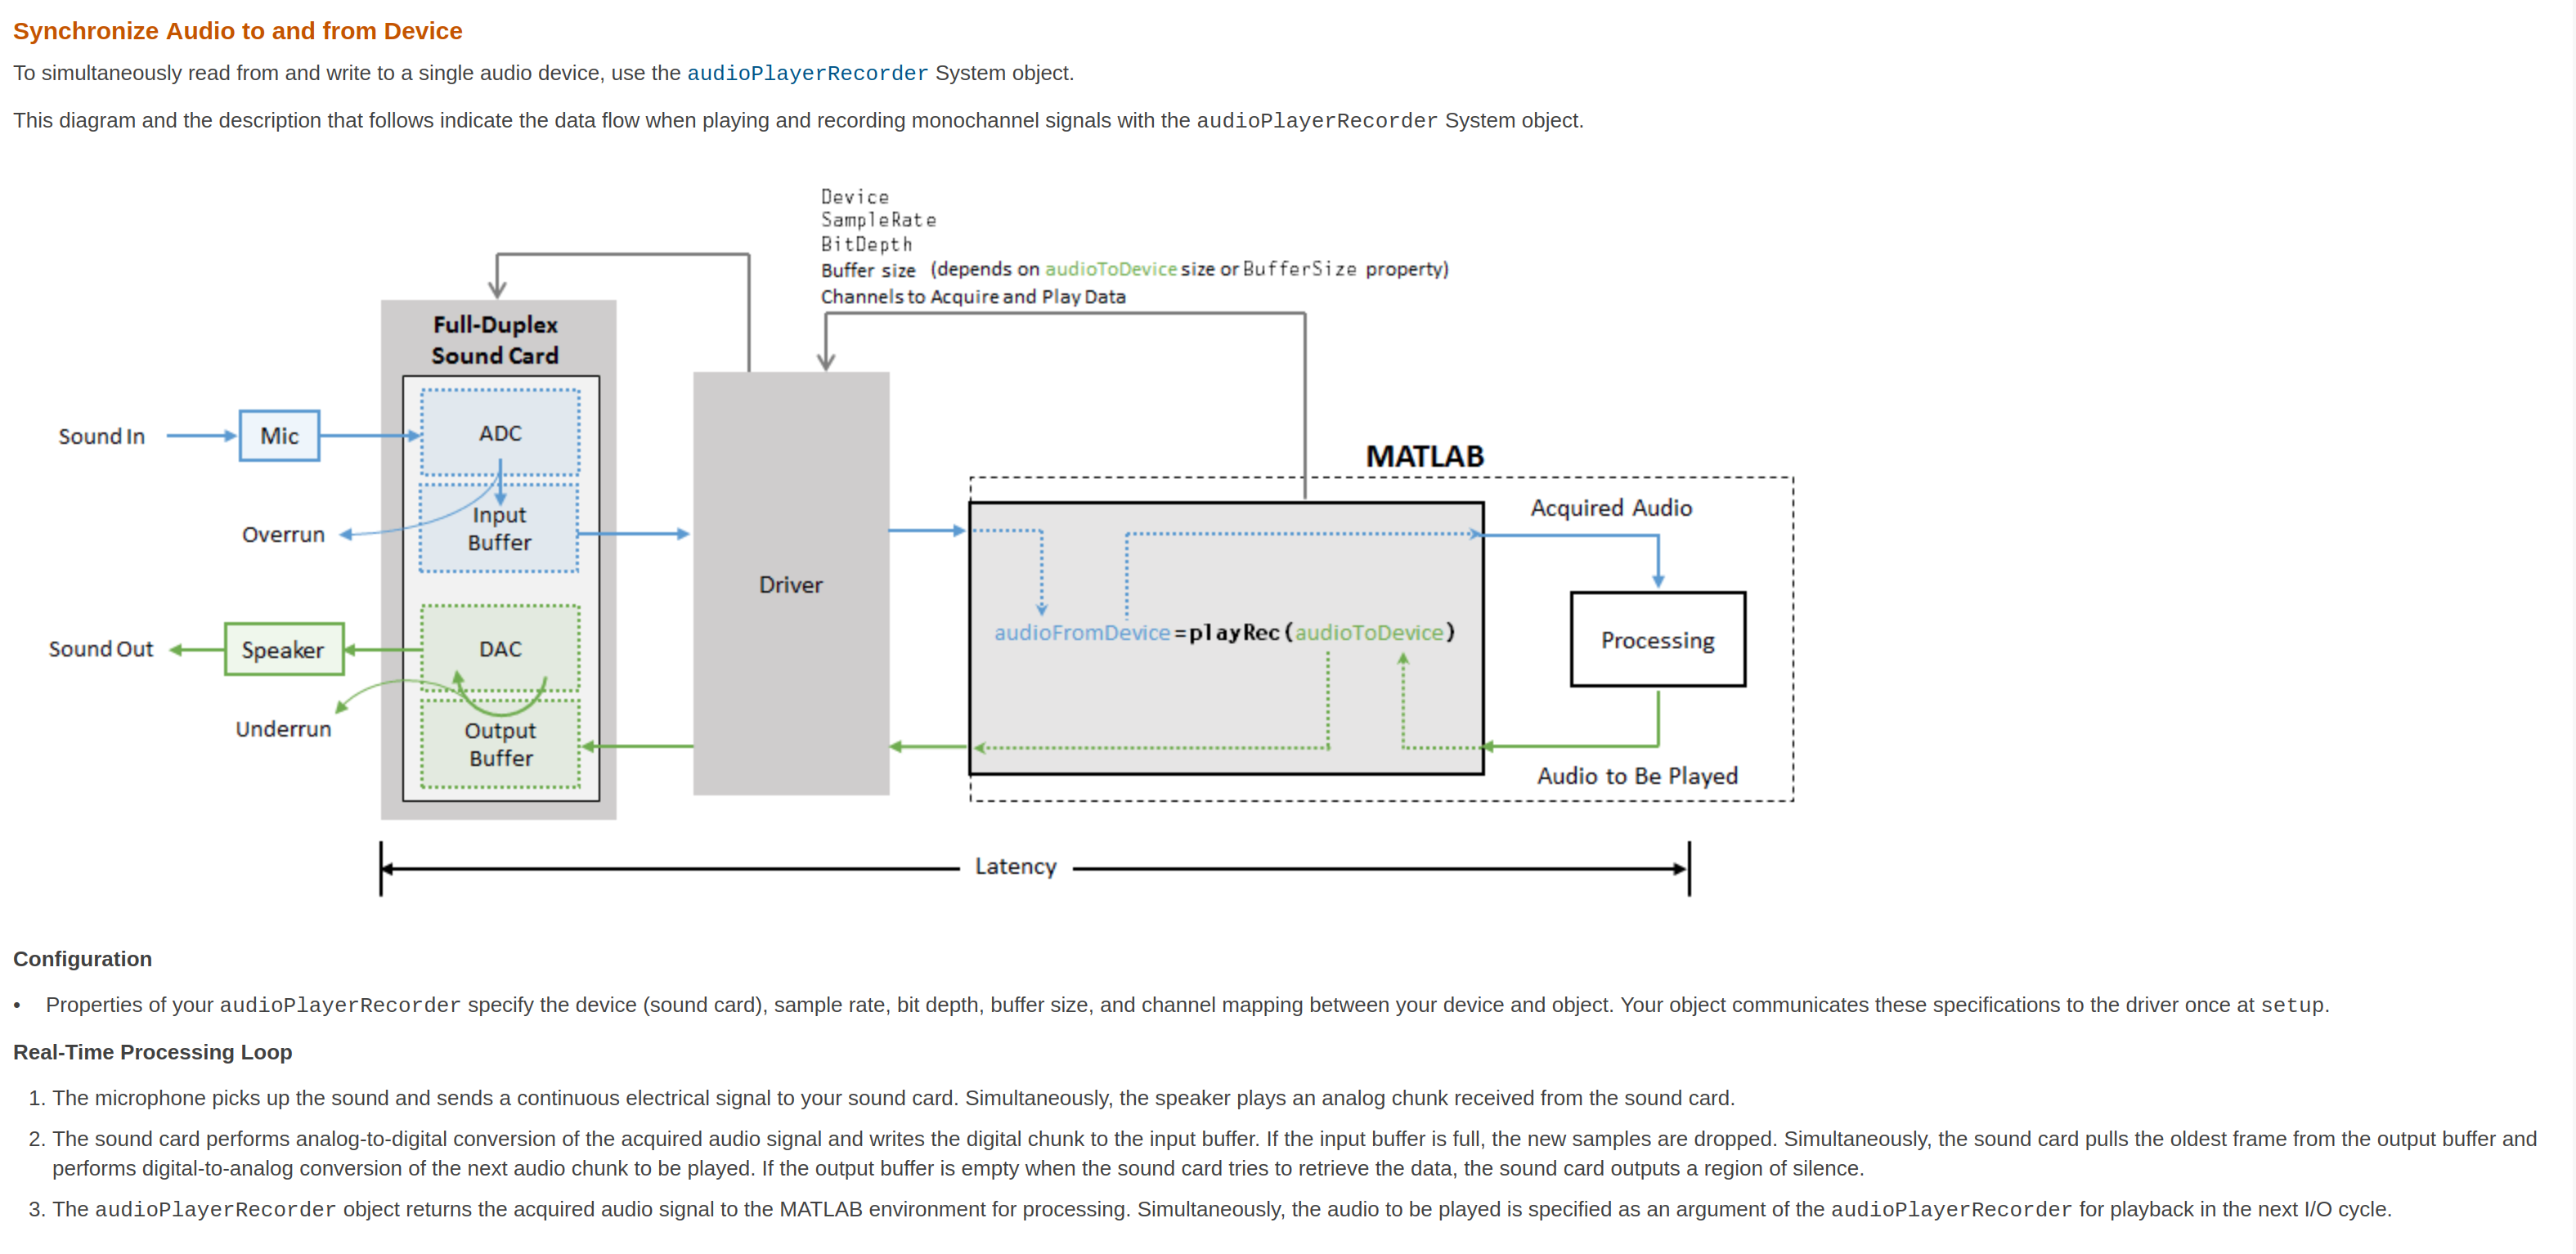

In [89]:
ipd.Image('img/synchronize_rec_read.png')

## **使用 Pyaudio 同时播放与录音**

在向 stream 写入数据以播放时，如果声道数写的 1，除非 rate 加倍（88200），否则播出来的音乐是有问题的，因为原文件是双声道采样

使用 wave 读取 .wav 音频文件中的数据，先**写入** stream 以 **播放**，然后迅速**读取**以**录音**

**唯一的问题是，录音保存后新生成的 .wav 音频文件播放时的响度小于原音频文件**，下面看一下标准化之后两个文件的振幅大小是否相同，如果标准化之后结果相同，就没有影响

</br>
</br>

In [84]:
def freq_index():
    end_index = []
    i = 10
    while i >0:
        end_index.append(int(chunk/2**i))
        i = i - 1

    start_index = end_index[:-1]
    start_index.insert(0,0)  
    
    return start_index, end_index

In [2]:
fft

NameError: name 'fft' is not defined

In [6]:
"""
使用 sounddevice 和 callback 实时绘制频谱

linda out 放在 callback 函数中报错
"""

import sounddevice as sd
import numpy as np
from codelab_adapter_client import AdapterNode
import time


class MyNode(AdapterNode):
    NODE_ID = "linda/test"

    def __init__(self):
        super().__init__()
        
node = MyNode()
node.receive_loop_as_thread()


chunk = 1024         # 每次以 1024 个 sample 为 1 组（chunk）
num_of_bands = 10          # downsample 频率范围，合并分成 12 组呈现结果          
fs = 44100                 # 采样率


def freq_index():
    end_index = []
    i = num_of_bands
    while i >0:
        end_index.append(int(chunk/2**i))
        i = i - 1

    start_index = end_index[:-1]
    start_index.insert(0,0)  
    
    return start_index, end_index

def callback(indata, frames, time, status):
    if status:
        print(status)
             
    if any(indata):
        data_w = indata*np.hanning(len(indata))
        fft = np.abs(np.fft.fft(data_w))[0:int(chunk/2)]/chunk
        print(np.shape(fft))
        fft[1:] = 2*fft[1:]
        

        out_li = [i for i in range(num_of_bands)]
        
        start_index, end_index = freq_index()
       
        for i in np.arange(num_of_bands):
            fft_band = np.mean(fft[start_index[i]:end_index[i]])   
            out_li[i] = float(fft_band)
            i = i +1
        print(out_li)
        outlist = ['X2_12',out_li]
        #node.linda_out(outlist)

        
    else:
        print("no input")

try:
    with sd.InputStream(channels=1, callback=callback, blocksize=chunk, samplerate=fs, dtype='int16'):
        while True:
            time.sleep(1/fs*chunk)
            
except KeyboardInterrupt:
    print('interrupt by user')


(512, 1024)
[0.023448897798447086, 0.19931563128680024, 0.12310671344184718, 0.3126519706459611, 0.2992177062822675, 0.2926227037764543, 0.17250816739742975, 0.20203301657854736, 0.22058146112614707, 0.2607468583316903]
(512, 1024)
[0.09672670341859421, 0.212994155002561, 0.26673121245733555, 0.579871701807431, 0.7811414079107685, 0.23143573608363138, 0.13586926458735615, 0.2892336052665224, 0.20589536758310925, 0.2201387410505254]
(512, 1024)
[0.14655561124029426, 0.212994155002561, 0.07718595525322164, 0.21934489815630714, 0.17879784571315907, 0.12286245408978005, 0.3092323397170209, 0.1864309504652577, 0.24332811328740112, 0.22306985327533124]
(512, 1024)
[0.19931563128680024, 0.3302386439947964, 0.2071319305529493, 0.08353669840696773, 0.05935502255231918, 0.34721466896346387, 0.2093302647215537, 0.4023256852736162, 0.3784340673995474, 0.2571592990982039]
(512, 1024)
[0.004885187041343143, 0.060576319312654975, 0.15241783568990605, 0.3873953323785112, 0.3954558909967274, 0.23216851

In [9]:
x2

NameError: name 'x2' is not defined

In [52]:
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
b = np.mean(a[1:3])
b

0.0

In [55]:
c=float(b)

In [60]:
e=[1,2,3]
e[0]=c

In [62]:
type(e[0])

float

In [33]:
end_index = []
for i in np.arange(10):    
    end_index.append(int((chunk/2)/2**i)-1)
end_index.reverse()



In [237]:
start_index = [0]
for i in end_index[:-1]:
    start_index.append(i+1)

In [234]:
end_index

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511]

In [238]:
start_index

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256]

In [224]:
indata

NameError: name 'indata' is not defined

In [166]:
sd.default.channels

[1, 1]

In [163]:
len(x)

926100

In [149]:
import sounddevice as sd


sample_rate = 44100
chunk = 1024

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata
    

with sd.RawStream(samplerate=sample_rate, blocksize=chunk, channels=2, callback=callback):
    print("playing")


From cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x7fe3987cb040>:
Traceback (most recent call last):
  File "/home/yangliuqing/.pyenv/versions/BeatsTracking/lib/python3.8/site-packages/sounddevice.py", line 866, in callback_ptr
    return _wrap_callback(
  File "/home/yangliuqing/.pyenv/versions/BeatsTracking/lib/python3.8/site-packages/sounddevice.py", line 2678, in _wrap_callback
    callback(*args)
  File "<ipython-input-149-9d8bdddfd8c7>", line 11, in callback
AttributeError: cdata 'struct PaStreamCallbackTimeInfo *' has no field 'sleep'


playing


In [144]:
sd.query_devices()

  0 HD-Audio Generic: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
  1 HD-Audio Generic: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
  2 hdmi, ALSA (0 in, 8 out)
  3 pulse, ALSA (32 in, 32 out)
* 4 default, ALSA (32 in, 32 out)

In [129]:
import sounddevice as sd
import queue
import threading
import soundfile as sf

chunk = 1024
num_chunk_perBuffer = 20

q = queue.Queue(maxsize = num_chunk_perBuffer)

event = threading.Event()


def callback(outdata, frames, time, status):
    if status:
        print(status)

    data = q.get_nowait()
    outdata[:]=data


try:
    with sf.SoundFile("audio/magoo.wav") as sf:
        for i in range(num_chunk_perBuffer):
            data = sf.buffer_read(chunk, dtype="float32")
            q.put_nowait(data)
        stream = sd.RawOutputStream(
        samplerate = 44100, blocksize=chunk, channels=2, dtype="float32", callback=callback, 
        finished_callback = event.set)
        
        with stream:
            timeout = chunk*num_chunk_perBuffer/44100
            while data:
                data = sf.buffer_read(chunk, dtype="float32")
                q.put(data,timeout=timeout)
            
            event.wait()
            
except KeyboardInterrupt:
    print("stop")

output underflow
stop


In [110]:
myrecording = sd.playrec(myrecording,88100,channels=1)

In [111]:
myrecording

array([[  0],
       [  0],
       [  0],
       ...,
       [635],
       [667],
       [703]], dtype=int16)

In [109]:
frames

array([   -3,    -3,    -3, ..., -5198, -5848, -5210], dtype=int16)

In [99]:
sd.stop()

In [92]:
import pyaudio
import wave


FORMAT = pyaudio.paInt16
CHANNELS = 2
CHUNK = 1024
RATE = 44100


wf = wave.open('audio/song_seg.wav','rb')

audio = pyaudio.PyAudio()


stream = audio.open(format              = FORMAT,
                    channels            = CHANNELS,
                    rate                = RATE,
                    input               = True,
                    output              = True,
                    frames_per_buffer   = CHUNK)


data = wf.readframes(CHUNK)


try:
    
    frames = []
    print("* echoing")
    print("Press CTRL+C to stop")
    while len(data)>0:
        stream.write(data)
        data = wf.readframes(CHUNK)
        data1 = stream.read(CHUNK)
        frames.append(data1)
 
    print("* done echoing")
    
except KeyboardInterrupt:
    stream.stop_stream()
    stream.close()
    audio.terminate()

    
wavefile = wave.open('name1.wav', 'wb')
wavefile.setnchannels(2)
wavefile.setsampwidth(audio.get_sample_size(FORMAT))
wavefile.setframerate(RATE)
wavefile.writeframes(b''.join(frames))
wavefile.close()

* echoing
Press CTRL+C to stop
* done echoing


In [ ]:
import pyaudio
import time
import wave
#import json


FORMAT = pyaudio.paInt16
CHANNELS =2
CHUNK = 1024
RATE = 44100


wf = wave.open('song_seg.wav','rb')

audio = pyaudio.PyAudio()

#for i in range(audio.get_device_count()):
    #print(json.dumps(audio.get_device_info_by_index(i), indent=2))

stream = audio.open(format              = FORMAT,
                    channels            = CHANNELS,
                    rate                = RATE,
                    #input               = True,
                    output              = True,
                    frames_per_buffer   = CHUNK)


data = wf.readframes(CHUNK)


try:
    
    print("* echoing")
    print("Press CTRL+C to stop")
    while len(data)>0:
        stream.write(data)
        data = wf.readframes(CHUNK)
        #time.sleep(0.02)

 
    print("* done echoing")
    
except KeyboardInterrupt:
    stream.stop_stream()
    stream.close()
    audio.terminate()

